In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [100]:
df = pd.read_excel('./Shopping Trends - Q2/shopping_trends.xlsx')

In [101]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [102]:
px.histogram(df, x='Review Rating', color='Gender')

In [103]:
px.histogram(df, x='Subscription Status', color='Gender')

In [19]:
df.Season.value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

In [ ]:
long_df = px.data.medals_long()

fig = px.histogram(df, x="nation",
                   y="count", color="medal",
                   barnorm='percent', text_auto='.2f',
                   title="Long-Form Input")

fig.show()

In [93]:
clothes_df = df[df['Category'] == 'Footwear']
px.histogram(clothes_df, x='Color', color='Season', barnorm='percent', text_auto='.2f',)

In [90]:
colour_tendency = clothes_df.groupby('Color')['Season'].value_counts(normalize=True).mul(100).round(2).unstack()

In [92]:
colour_tendency

Season,Fall,Spring,Summer,Winter
Color,,,,
Beige,42.86,14.29,28.57,14.29
Black,10.00,30.00,40.00,20.00
Blue,31.58,15.79,26.32,26.32
Brown,33.33,8.33,25.00,33.33
Charcoal,10.00,20.00,40.00,30.00
Cyan,18.75,62.50,12.50,6.25
Gold,9.09,27.27,18.18,45.45
Gray,20.00,26.67,26.67,26.67
Green,35.71,14.29,14.29,35.71


In [91]:
px.imshow(colour_tendency.transpose(), aspect='auto', text_auto=True)

In [75]:
colour_tendency = colour_tendency.transpose()

In [76]:
fig = px.scatter(colour_tendency[colour_tendency > 30])
fig.update_traces(marker_size = 25)
fig.update_layout(showlegend = False)
fig.show()

In [80]:
df.Category.value_counts().index

Index(['Clothing', 'Accessories', 'Footwear', 'Outerwear'], dtype='object', name='Category')

In [180]:
px.histogram(df, x='Category')

In [115]:
def color_plotter(df, categories):
    for category in categories:
        temp_df = df[df['Category'] == category]
        colour_tendency = temp_df.groupby('Color')['Season'].value_counts(normalize=True).mul(100).round(2).unstack()
        colour_tendency = colour_tendency.transpose()
        fig = px.histogram(temp_df, x='Color', color='Season', barnorm='percent', text_auto='.2f', title=f'{category} colour dominance per season')
        fig.show()
        fig = px.scatter(colour_tendency[colour_tendency > 30], title=f'Popular colours for {category} per season')
        fig.update_traces(marker_size = 15)
        fig.update_layout(showlegend = False)
        fig.show()
        

    

In [116]:
color_plotter(df, list(df.Category.value_counts().index))

# Review Rating and Subscription Status

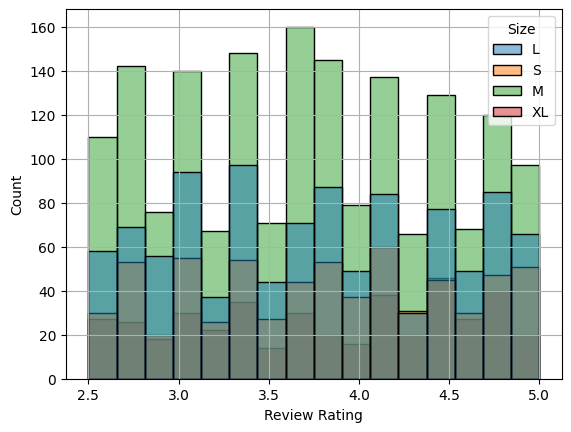

In [129]:
sns.histplot(df, x='Review Rating',  hue='Size')
plt.grid()
plt.show()

In [143]:
df2.Gender = [1 if gen == 'Male' else 0 for gen in df2.Gender]

In [151]:
item_buyers = df.groupby('Item Purchased')['Gender'].value_counts(normalize=True).mul(100).round(2).unstack()


In [153]:
df['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

### The number of male records is double the number of female entries. In order to balance it, we can take a random sample of male records of size equal to the number of female records to balance the data.

In [158]:
male_df = df[df.Gender == 'Male']
female_df = df[df.Gender == 'Female']
gender_balanced_df = pd.concat([female_df, male_df.sample(n=female_df.shape[0])])

In [163]:
gender_balanced_df.Gender.value_counts()

Gender
Female    1248
Male      1248
Name: count, dtype: int64

In [167]:
item_buyers = gender_balanced_df.groupby('Item Purchased')['Gender'].value_counts(normalize=True).mul(100).round(2).unstack()

In [173]:
fig = px.histogram(gender_balanced_df, x='Item Purchased', color='Gender', barnorm='percent', text_auto='.2f')
fig.show()

In [176]:
fig = px.scatter(item_buyers[item_buyers > 50])
fig.update_traces(marker_size = 15)
fig.show()

In [235]:
reviews = df.groupby('Item Purchased')['Review Rating'].mean().round(2)
fig = px.line(reviews.sort_values())
# fig.update_traces(marker_size=15)
fig.show()

In [225]:
reviews = df.groupby('Location')['Review Rating'].mean().round(2)
fig = px.line(reviews.sort_values())
fig.show()

In [227]:
reviews = df.groupby('Color')['Review Rating'].mean().round(2)
fig = px.line(reviews.sort_values())
fig.show()

In [238]:
reviews = df.groupby('Item Purchased')['Review Rating'].mean().round(2)
rev2 = df.groupby('Item Purchased')['Purchase Amount (USD)'].mean().round(2)
trace1 = go.Scatter(y=reviews, mode='lines', name='Line 1')
trace2 = go.Scatter(y=rev2,mode='lines', name='Line 2')
# trace3 = go.Scatter(x=x, y=y3, mode='lines', name='Line 3')

# Create a layout for the plot
layout = go.Layout(title='Multiple Lines in One Plot')

# Create a Figure with all the traces
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the plot
fig.show()

<Axes: xlabel='Item Purchased', ylabel='Purchase Amount (USD)'>

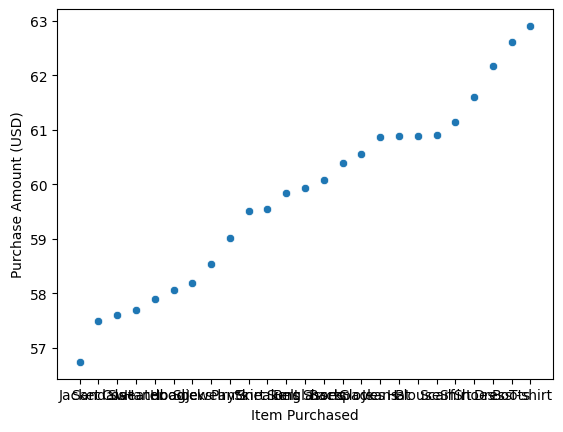

In [230]:
reviews = df.groupby('Item Purchased')['Purchase Amount (USD)'].mean().round(2)
sns.scatterplot(reviews.sort_values())

In [221]:
px.pie(df, names='Subscription Status')

In [194]:
px.histogram(df, x = 'Review Rating', color='Category')

In [239]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [244]:
px.imshow(df[['Purchase Amount (USD)', 'Previous Purchases', 'Review Rating']].corr().round(2), text_auto=True, aspect = 'auto')

In [245]:
sns.heatmap()

ValueError: could not convert string to float: 'Male'